In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('df_sem_outliers.csv')

# Dividir os dados em conjunto de treinamento e teste
X = df[["AREA", "QUARTOS", "BANHEIROS", "VAGAS","BAIRRO"]]
y = df["PRECO"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Criar o modelo de Floresta Aleatória
reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=0)

In [12]:
# Fazer previsões com o conjunto de teste
y_pred = reg.predict(X_test)

In [14]:
# Calcular a raiz do erro quadrático médio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 234030.50242916663
Erro percentual: 23.65433358317232 %


In [11]:
# Calcular o erro percentual
error_percentual = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
print("Erro percentual:", error_percentual, "%")

Erro percentual: 23.65433358317232 %


In [15]:
variance = np.var(y_test)
print("Variance:", variance)

# Comparar o RMSE com a variância dos dados
if rmse <= variance:
    print("O RMSE é satisfatório, pois é menor ou igual à variância dos dados.")
else:
    print("O RMSE é insatisfatório, pois é maior que a variância dos dados.")

Variance: 136077370873.40007
O RMSE é satisfatório, pois é menor ou igual à variância dos dados.


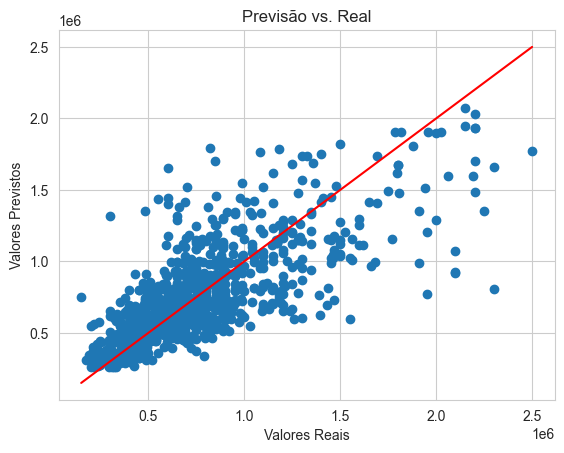

Diferenças absolutas: [469483.33333333  89538.19083694  88982.81746032 ... 272272.62323962
  94938.90873016 349401.85714286]
Diferenças relativas: [0.40824638 0.18088523 0.11408054 ... 0.20944048 0.19179578 0.29116821]
MSE: 59967130870.0915
RMSE: 244881.8712565132


In [48]:
# Criar data frame com valores reais e previstos
df_compare = pd.DataFrame({'Valores Reais': y_test, 'Valores Previstos': y_pred})

# Gerar gráfico de previsão vs. real
valores_reais = df_compare['Valores Reais']
valores_previstos = df_compare['Valores Previstos']

min_valor = min(valores_reais)
max_valor = max(valores_reais)
valores_diagonal = np.linspace(min_valor, max_valor, 100)

plt.scatter(valores_reais, valores_previstos)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Previsão vs. Real")
plt.plot(valores_diagonal, valores_diagonal, '-r')  # linha diagonal
plt.show()

# Calcular a diferença absoluta entre os valores previstos e os valores reais
diferencas = np.abs(np.array(valores_previstos) - np.array(valores_reais))

# Calcular a diferença relativa entre os valores previstos e os valores reais
diferencas_relativas = diferencas / np.array(valores_reais)

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(valores_reais, valores_previstos)

# Calcular o root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Imprimir as diferenças absolutas e relativas
print("Diferenças absolutas:", diferencas)
print("Diferenças relativas:", diferencas_relativas)

# Imprimir o MSE e o RMSE
print("MSE:", mse)
print("RMSE:", rmse)

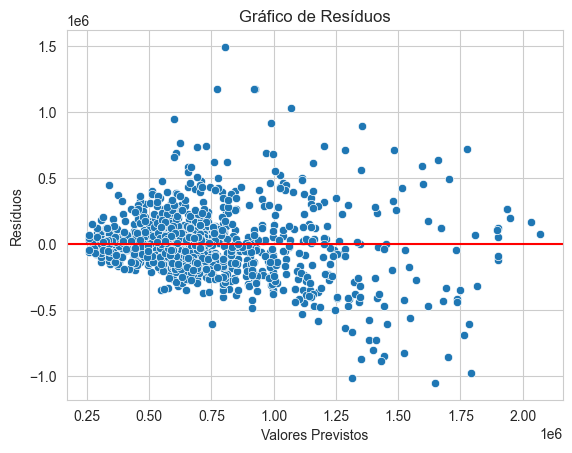

In [38]:
y_pred = reg.predict(X_test)
residuals = y_test - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15096\1283595101.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


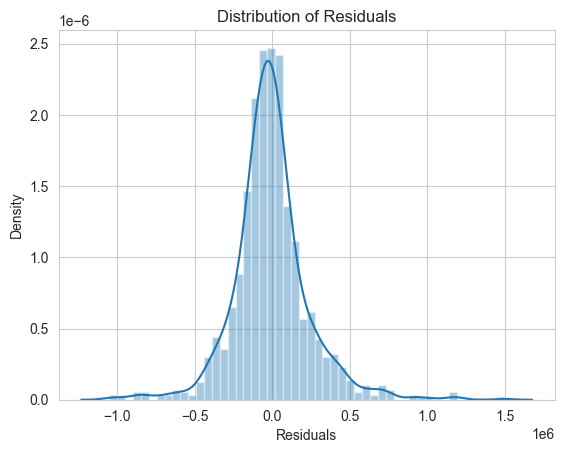

In [39]:
residuals = y_test - y_pred

sns.distplot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Distribution of Residuals")
plt.show()


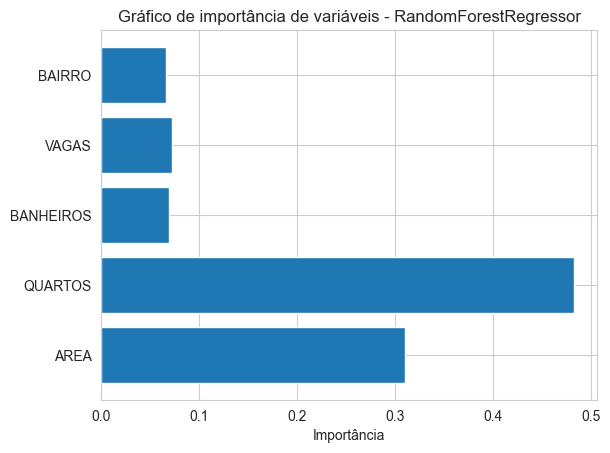

In [44]:
# Obter o vetor de importâncias de variáveis
importances = reg.feature_importances_

# Criar uma lista com o nome das variáveis
features = X.columns

# Plotar o gráfico de importâncias de variáveis
plt.barh(features, importances)
plt.xlabel("Importância")
plt.title("Gráfico de importância de variáveis - RandomForestRegressor")
plt.show()

In [30]:
df2 = pd.read_csv('fact-bairros.csv')
bairros = ['BAIRRO_NUM', 'BAIRRO_NOME']
df_bairros = df2[bairros]
bairros_unicos = df_bairros.drop_duplicates()
bairros_unicos.head()

,BAIRRO_NUM,BAIRRO_NOME
0,0,Centro
1,1,Zona Nova
2,2,Navegantes
51,3,Jardim Beira Mar


In [31]:
# Obter entrada do usuário
area = float(input("Digite o tamanho da área do imóvel: "))
quartos = float(input("Digite o número de quartos do imóvel: "))
banheiros = float(input("Digite o número de banheiros do imóvel: "))
vagas = float(input("Digite o número de vagas do imóvel: "))
bairro = float(input("Digite o bairro do imóvel: "))

# Criar uma lista com as características do imóvel
novo_imovel = [[area, quartos, banheiros, vagas, bairro]]

# Fazer previsão do valor do novo imóvel
previsao = reg.predict(novo_imovel)

print("Área: ", area)
print("Quartos: ", quartos)
print("Banheiros: ", banheiros)
print("Vagas: ", vagas)
print("Bairro: ", bairro)
print("Previsão do valor do imóvel: R$ {:.2f}".format(round(previsao[0], 2)))

Área:  100.0
Quartos:  2.0
Banheiros:  2.0
Vagas:  2.0
Bairro:  2.0
Previsão do valor do imóvel: R$ 833925.21


G:\Diovani\PyCharmProjects\exploratory-data-analysis-capaocity\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
